<a href="https://colab.research.google.com/github/Alina2004A/BMD/blob/main/Levchenko_7_prakt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>7 практична</h1>
<p><font size=10>Левченко БС-11</font></p>

Створюючи базу даних я вивчила тему летальності випадків ДТП при різних швидкостях зіткнення автомобіля з пішоходом
В одному з ПДФ файлів сайту http://www.ador.ru я наткнулась на статистику, що стверджує наступне:
на швидкості >38 км/год відсоток летальності 15, >48 км/год - 45 , >64 км/год - 85
Виходячи з цих даних я згенерула по 10 випадкових чисел на кожну з груп, розподілених за нормальним розподілом, 
приблизно з однаковим стандартним відхиленням (а отже і дисперсією)
та присвоїла кожному рядку, придуману назву, нехай це будуть назви штатів. Так база даних виглядає більш-менш правдоподібна


In [1]:
import pandas as pd
data = pd.DataFrame({
    "State" : ["Arizona", "Texas", "California", "Florida", "Kansas", "Michigan", "Nebraska", "New York", "Washington", "Ohio"],
    "Speed > 38" : [23.36, 6.5, 13.37, 17.66, 8.0, 9.6, 23.87, 27.37, 16.7, 9.73],
    "Speed > 48" : [61.85, 42.89, 34.93, 39.64, 41.79, 35.73, 48.7, 61.12, 49.28, 38.63],
    "Speed > 64" : [89.91, 75.18, 87.24, 78.42, 70.41, 95.3, 91.52, 90.47, 91.74, 96.78]
})

data

,State,Speed > 38,Speed > 48,Speed > 64
0,Arizona,23.36,61.85,89.91
1,Texas,6.50,42.89,75.18
2,California,13.37,34.93,87.24
3,Florida,17.66,39.64,78.42
4,Kansas,8.00,41.79,70.41
5,Michigan,9.60,35.73,95.30
6,Nebraska,23.87,48.70,91.52
7,New York,27.37,61.12,90.47
8,Washington,16.70,49.28,91.74
9,Ohio,9.73,38.63,96.78


Text(0.5, 0, 'Deaths')

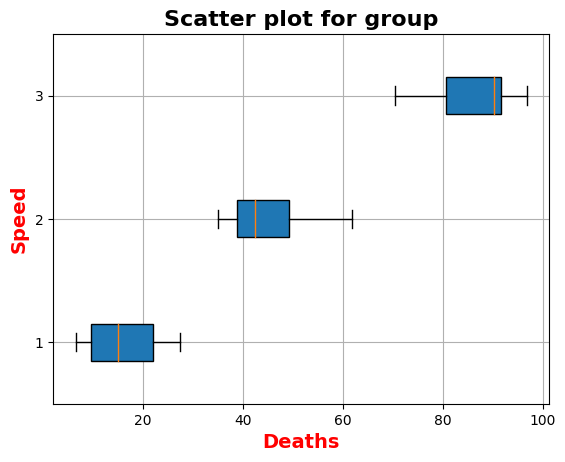

In [3]:
import matplotlib.pyplot as plt
current_data = [data["Speed > 38"], data["Speed > 48"], data["Speed > 64"]]
plt.boxplot(x = current_data, vert = False, patch_artist = True, widths = 0.3)
plt.grid()
plt.title('Scatter plot for group', fontweight = 'bold', fontsize = 16);
plt.ylabel('Speed', color = 'r', fontweight = 'bold', fontsize = 14)
plt.xlabel('Deaths', color = 'r', fontweight = 'bold', fontsize = 14)

Додаємо до таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп)

In [4]:
Sum_string = ["Sum", data["Speed > 38"].sum(), data["Speed > 48"].sum(), data["Speed > 64"].sum()]
Std_string = ["Std", data["Speed > 38"].std(), data["Speed > 48"].std(), data["Speed > 64"].std()]
data.loc[10] = Sum_string
data.loc[11] = Std_string
data

,State,Speed > 38,Speed > 48,Speed > 64
0,Arizona,23.360000,61.850000,89.910000
1,Texas,6.500000,42.890000,75.180000
2,California,13.370000,34.930000,87.240000
3,Florida,17.660000,39.640000,78.420000
4,Kansas,8.000000,41.790000,70.410000
5,Michigan,9.600000,35.730000,95.300000
6,Nebraska,23.870000,48.700000,91.520000
7,New York,27.370000,61.120000,90.470000
8,Washington,16.700000,49.280000,91.740000
9,Ohio,9.730000,38.630000,96.780000


Розраховуємо основні величини однофакторного дисперсійного аналізу для зручної підстановки у формули

In [5]:
T_sum_sq = ((data["Speed > 38"][10]) ** 2) + ((data["Speed > 48"][10]) ** 2) + ((data["Speed > 64"][10]) ** 2)
c = data.shape[1] - 1
n = data.shape[0] - 2
N = n * 3
Square_main_sum = ((data["Speed > 38"][10]) + (data["Speed > 48"][10]) + (data["Speed > 64"][10])) ** 2
Difference_const = Square_main_sum / N
Sum_square_individual = 0

for i in range(1, c + 1):
    for j in range(n):
        Sum_square_individual += (data[list(data)[i]][j]) ** 2

print(Sum_square_individual)

100314.1145


Критичне значення для критерію Фішера враховуючи наші дані, а саме: ступені свободи 3 - 1 та 30 - 1 дорівнює 3,3. Далі буду брати його як F_crit

Функція, що реалізовує двохфакторний дисперсійний аналіз

In [6]:
def Disp_analysis():
    SS_fact = (T_sum_sq / n) - (Difference_const)
    SS_com = (Sum_square_individual) - (Difference_const)
    SS_res = (SS_com) - (SS_fact)
    d_fact = c - 1
    d_com = N - 1
    d_res = (d_com) - (d_fact)
    MS_fact = (SS_fact) / (d_fact)
    MS_res = (SS_res) / (d_res)
    F_emp = (MS_fact) / (MS_res)
    F_crit = 3.3
    if F_emp > F_crit:
        Equality = 'NOT confirmed'
    else:
        Equality = 'confirmed'
    
    total = pd.DataFrame({
        "Stage" : ["SS_fact", "SS_com", "SS_res", "d", "MS", "F_emp", "F_crit", "Equality"],
        "Result" : [SS_fact, SS_com, SS_res, d_res, MS_res, F_emp, F_crit, Equality],
    })
    print(" ")
    print(total)
    
Disp_analysis()

 
      Stage         Result
0   SS_fact   25479.180807
1    SS_com   27528.523297
2    SS_res     2049.34249
3         d             27
4        MS      75.901574
5     F_emp     167.843561
6    F_crit            3.3
7  Equality  NOT confirmed
